In [74]:
#declaring dependancies 
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as sts

%matplotlib inline

In [80]:
#load data from csv
load_city_data = os.path.join("Resources", "city_data.csv")
load_ride_data = os.path.join("Resources", "ride_data.csv")

#read CSV
city_data_df = pd.read_csv(load_city_data)
ride_data_df = pd.read_csv(load_ride_data)

city_data_df.head()
#ride_data_df.head()

#Data Inspection

#city_data_df.count
# 121 rows 3 columns (city, driver count, type (urban/rural))
#ride_data_df.count
# 2376 rows 4 columns, city, date, fare, ride id

#number of rows
#data types

#city_data_df.dtypes
#city (object string), driver count(int 64), type (object string)
#ride_data_df.dtypes
#city (object string). date (object string), fare (float64), ride id (int64)

#data readable?
#city data OK
#ride data OK


,city,driver_count,type
0,Richardfort,38,Urban
1,Williamsstad,59,Urban
2,Port Angela,67,Urban
3,Rodneyfort,34,Urban
4,West Robert,39,Urban


In [76]:
### Project Goals
# import and merge dataframes 
# create bubble chart to show average fare fs total number of rides with bubble size based on total number of drivers for each city type including urban, suburban, and rural
# determine mean median and mode for total number of rides of each city type, average fare for each city type, and total number of drivers for each city type

# create box and whisker plots to visualize: number of rides for each city type, fare for each city type, number of drivers for each city type

# create a pie chart that visualizes percent of total fares, rides, and drivers for each city type.


In [81]:
# City data inspection:

city_data_df.count()
city_data_df.isnull().sum()
city_data_df.dtypes
city_data_df["type"].unique()

sum(city_data_df["type"]=="Urban")
# 66 Urban

sum(city_data_df["type"]=="Suburban")
#36

sum(city_data_df["type"]=="Rural")
#18


18

In [82]:
# City data inspection:

city_data_df.count()
city_data_df.isnull().sum()
city_data_df.dtypes
city_data_df["type"].unique()

# merge dataframe by city left merge ride data is A city data is B

complete_pyber_df =pd.merge(ride_data_df, city_data_df, on="city", how="left")
complete_pyber_df.head(20)

,city,date,fare,ride_id,driver_count,type
0,Lake Jonathanshire,2019-01-14 10:14:22,13.83,5739410935873,5,Urban
1,South Michelleport,2019-03-04 18:24:09,30.24,2343912425577,72,Urban
2,Port Samanthamouth,2019-02-24 04:29:00,33.44,2005065760003,57,Urban
3,Rodneyfort,2019-02-10 23:22:03,23.44,5149245426178,34,Urban
4,South Jack,2019-03-06 04:28:35,34.58,3908451377344,46,Urban
5,South Latoya,2019-03-11 12:26:48,9.52,1994999424437,10,Urban
6,New Paulville,2019-02-27 11:17:56,43.25,793208410091,44,Urban
7,Simpsonburgh,2019-04-26 00:43:24,35.98,111953927754,21,Urban
8,South Karenland,2019-01-08 03:28:48,35.09,7995623208694,4,Urban
9,North Jasmine,2019-03-09 06:26:29,42.81,5327642267789,33,Urban


In [83]:
### create bubble chart to show average fare fs total number of rides with bubble size based on total number of drivers for each city type including urban, suburban, and rural

#Separate dataframes into multiple data frames by city type

urban_city_df = complete_pyber_df[complete_pyber_df["type"]=="Urban"]
suburban_city_df = complete_pyber_df[complete_pyber_df["type"]=="Suburban"]
rural_city_df = complete_pyber_df[complete_pyber_df["type"]=="Rural"]

rural_city_df.head()



,city,date,fare,ride_id,driver_count,type
2250,Randallchester,2019-04-13 11:13:31,43.22,1076079536213,9,Rural
2251,North Holly,2019-02-02 14:54:00,12.42,1985256326182,8,Rural
2252,Michaelberg,2019-03-27 18:27:34,54.85,4421836952718,6,Rural
2253,Lake Latoyabury,2019-02-23 21:12:24,47.90,3269652929887,2,Rural
2254,Lake Latoyabury,2019-05-06 08:57:56,51.80,4018025271936,2,Rural


In [84]:
# determine the amount of rides in each city for each city type.  Groupby city and count unique ride id
# creates a dataframe of the type of city listing the city and the count of unique rides

urban_ride_count = urban_city_df.groupby(["city"]).count()["ride_id"]
suburban_ride_count = suburban_city_df.groupby(["city"]).count()["ride_id"]
rural_ride_count = rural_city_df.groupby(["city"]).count()["ride_id"]

urban_ride_count

city
Amandaburgh            18
Barajasview            22
Carriemouth            27
Christopherfurt        27
Deanville              19
                       ..
West Patrickchester    16
West Robert            31
West Samuelburgh       25
Williamsstad           23
Williamsview           20
Name: ride_id, Length: 66, dtype: int64

In [109]:
#average fare for each city.  group each city type data by city mean fare
# creates a dataframe of the type of city listing city and the average fare

urban_avg_fare = urban_city_df.groupby(["city"]).mean()["fare"]
suburban_avg_fare = suburban_city_df.groupby(["city"]).mean()["fare"]
rural_avg_fare = rural_city_df.groupby(["city"]).mean()["fare"]

count    66.000000
mean     24.499122
std       2.190653
min      20.093158
25%      22.799102
50%      24.476732
75%      25.965357
max      28.993750
Name: fare, dtype: float64

In [86]:
#average driver count for each city type grouped by city
# Its technically the same, don't really need to average it, every city has a fixed driver count so the average of x number of N drivers is still N?

urban_avg_driver =urban_city_df.groupby(["city"]).mean()["driver_count"]
suburban_avg_driver =suburban_city_df.groupby(["city"]).mean()["driver_count"]
rural_avg_driver =rural_city_df.groupby(["city"]).mean()["driver_count"]

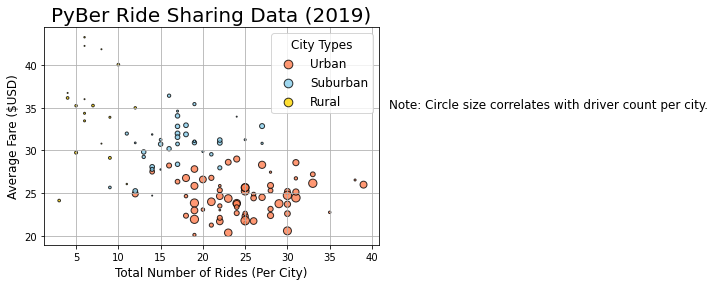

In [87]:
# create scatter plot of number of rides against average fare scalled dots by driver count

#urban plot

plt.scatter(urban_ride_count, urban_avg_fare, c= "coral", edgecolor = "black", linewidths=1, alpha = 0.8, label = "Urban", s=urban_avg_driver)
plt.scatter(suburban_ride_count, suburban_avg_fare, c="skyblue", edgecolor = "black", linewidths=1, alpha = 0.8, label = "Suburban", s=suburban_avg_driver)
plt.scatter(rural_ride_count, rural_avg_fare, c="gold", edgecolor = "black", linewidth=1, alpha = 0.8, label = "Rural", s=rural_avg_driver)

plt.title("PyBer Ride Sharing Data (2019)", fontsize = 20)
plt.ylabel("Average Fare ($USD)", fontsize = 12)
plt.xlabel("Total Number of Rides (Per City)", fontsize =12)

plt.grid(True)

# Set legend parameters
pyber_legend_bubble = plt.legend(fontsize=12, mode="Expanded", scatterpoints = 1, loc = "best", title = "City Types")
pyber_legend_bubble.legendHandles[0]._sizes = [75]
pyber_legend_bubble.legendHandles[1]._sizes = [75]
pyber_legend_bubble.legendHandles[2]._sizes = [75]
pyber_legend_bubble.get_title().set_fontsize(12)

#figure text
plt.text(42, 35, "Note: Circle size correlates with driver count per city.", fontsize="12")

# Save figure to file
plt.savefig("Analysis/bubble_plot.png")

plt.show()


In [88]:
### determine mean median and mode for total number of rides of each city type, average fare for each city type, and total number of drivers for each city type

# using .describe() basic statistics

print(urban_ride_count.describe())
print(suburban_ride_count.describe())
print(rural_ride_count.describe())


count    66.000000
mean     24.621212
std       5.408726
min      12.000000
25%      21.000000
50%      24.000000
75%      28.000000
max      39.000000
Name: ride_id, dtype: float64
count    36.000000
mean     17.361111
std       4.323707
min       9.000000
25%      14.000000
50%      17.000000
75%      19.250000
max      27.000000
Name: ride_id, dtype: float64
count    18.000000
mean      6.944444
std       2.508157
min       3.000000
25%       5.250000
50%       6.000000
75%       8.750000
max      12.000000
Name: ride_id, dtype: float64


In [89]:
#Testing mean median mode rounding feature
round(urban_ride_count.median(), 2)
suburban_ride_count.mode()

0    17
dtype: int64

In [90]:
# Can also calculate mean median and SciPy mode() and NumPy 

# need to import modules import numpy as np and scipy (import scipy.stats as sts)
# numpy (mean/median) sts (mode) for measures of central tendancies

# numpy/scipy urban
mean_urban_ride_count = np.mean(urban_ride_count)
print(f"The mean for the ride counts for urban trips is {mean_urban_ride_count:.2f}.")

median_urban_ride_count = np.median(urban_ride_count)
print(f"The median for the ride counts for urban trips is {median_urban_ride_count}.")

mode_urban_ride_count = sts.mode(urban_ride_count)
print(f"The mode for the ride counts for urban trips is {mode_urban_ride_count}.")

# numpy/scipy suburban
mean_suburban_ride_count = np.mean(suburban_ride_count)
print(f"The mean for the ride counts for urban trips is {mean_suburban_ride_count:.2f}.")

median_suburban_ride_count = np.median(suburban_ride_count)
print(f"The median for the ride counts for urban trips is {median_suburban_ride_count}.")

mode_suburban_ride_count = sts.mode(suburban_ride_count)
print(f"The mode for the ride counts for urban trips is {mode_suburban_ride_count}.")

# numpy/scipy rural
mean_rural_ride_count = np.mean(rural_ride_count)
print(f"The mean for the ride counts for urban trips is {mean_rural_ride_count:.2f}.")

median_rural_ride_count = np.median(rural_ride_count)
print(f"The median for the ride counts for urban trips is {median_rural_ride_count}.")

mode_rural_ride_count = sts.mode(rural_ride_count)
print(f"The mode for the ride counts for urban trips is {mode_rural_ride_count}.")

The mean for the ride counts for urban trips is 24.62.
The median for the ride counts for urban trips is 24.0.
The mode for the ride counts for urban trips is ModeResult(mode=array([22], dtype=int64), count=array([7])).
The mean for the ride counts for urban trips is 17.36.
The median for the ride counts for urban trips is 17.0.
The mode for the ride counts for urban trips is ModeResult(mode=array([17], dtype=int64), count=array([7])).
The mean for the ride counts for urban trips is 6.94.
The median for the ride counts for urban trips is 6.0.
The mode for the ride counts for urban trips is ModeResult(mode=array([6], dtype=int64), count=array([5])).


In [95]:
# calculate measures of central tendancies for the fare of each city
# create a variable that contains only the fare for all cities of a given city type, calculate measures of central tendancy, then merge into a dataframe

urban_fares = urban_city_df["fare"]
urban_fares_mean = np.mean(urban_fares)
urban_fares_median = np.median(urban_fares)
urban_fares_mode = sts.mode(urban_fares)

print(f"The mean fare price for urban trips is ${urban_fares_mean:.2f}.")
print(f"The median fare price for urban trips is ${urban_fares_median:.2f}.")
print(f"The mode fare price for urban trips is {urban_fares_mode}.")

suburban_fares = suburban_city_df["fare"]
suburban_fares_mean = np.mean(suburban_fares)
suburban_fares_median = np.median(suburban_fares)
suburban_fares_mode = sts.mode(suburban_fares)

print(f"The mean fare price for suburban trips is ${suburban_fares_mean:.2f}.")
print(f"The median fare price for suburban trips is ${suburban_fares_median:.2f}.")
print(f"The mode fare price for suburban trips is {suburban_fares_mode}.")

rural_fares = rural_city_df["fare"]
rural_fares_mean = np.mean(rural_fares)
rural_fares_median = np.median(rural_fares)
rural_fares_mode = sts.mode(rural_fares)

print(f"The mean fare price for rural trips is ${rural_fares_mean:.2f}.")
print(f"The median fare price for rural trips is ${rural_fares_median:.2f}.")
print(f"The mode fare price for rural trips is {rural_fares_mode}.")

The mean fare price for urban trips is $24.53.
The median fare price for urban trips is $24.64.
The mode fare price for urban trips is ModeResult(mode=array([22.86]), count=array([5])).
The mean fare price for suburban trips is $30.97.
The median fare price for suburban trips is $30.75.
The mode fare price for suburban trips is ModeResult(mode=array([17.99]), count=array([3])).
The mean fare price for rural trips is $34.62.
The median fare price for rural trips is $37.05.
The mode fare price for rural trips is ModeResult(mode=array([37.05]), count=array([2])).


In [133]:
# calculate measures of central tendancies for the number of drivers of each city
# create a variable that contains only drivers for all cities of a given city type, calculate measures of central tendancy, then merge into a dataframe

urban_drivers = urban_city_df["driver_count"]
urban_drivers_mean = np.mean(urban_drivers)
urban_drivers_median = np.median(urban_drivers)
urban_drivers_mode = sts.mode(urban_drivers)

print(f"The mean drivers for urban trips is {urban_drivers_mean:.0f}.")
print(f"The median drivers for urban trips is {urban_drivers_median:.0f}.")
print(f"The mode drivers for urban trips is {urban_drivers_mode}.")

suburban_drivers = suburban_city_df["driver_count"]
suburban_drivers_mean = np.mean(suburban_drivers)
suburban_drivers_median = np.median(suburban_drivers)
suburban_drivers_mode = sts.mode(suburban_drivers)

print(f"The mean drivers for suburban trips is {suburban_drivers_mean:.0f}.")
print(f"The median drivers for suburban trips is {suburban_drivers_median:.0f}.")
print(f"The mode drivers for suburban trips is {suburban_drivers_mode}.")

rural_drivers = rural_city_df["driver_count"]
rural_drivers_mean = np.mean(rural_drivers)
rural_drivers_median = np.median(rural_drivers)
rural_drivers_mode = sts.mode(rural_drivers)

print(f"The mean drivers for rural trips is {rural_drivers_mean:.0f}.")
print(f"The median drivers for rural trips is {rural_drivers_median:.0f}.")
print(f"The mode drivers for rural trips is {rural_drivers_mode}.")

The mean drivers for urban trips is 37.
The median drivers for urban trips is 37.
The mode drivers for urban trips is ModeResult(mode=array([39], dtype=int64), count=array([86])).
The mean drivers for suburban trips is 14.
The median drivers for suburban trips is 16.
The mode drivers for suburban trips is ModeResult(mode=array([20], dtype=int64), count=array([79])).
The mean drivers for rural trips is 4.
The median drivers for rural trips is 4.
The mode drivers for rural trips is ModeResult(mode=array([1], dtype=int64), count=array([32])).


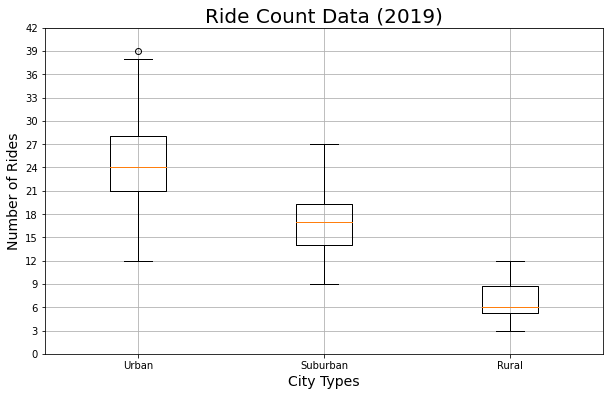

West Angela has the highest rider count, and is an outlier.


In [134]:
# create box and whisker plots to visualize: number of rides for each city type, fare for each city type, number of drivers for each city type

x_labels = ["Urban", "Suburban","Rural"]
ride_count_data = [urban_ride_count, suburban_ride_count, rural_ride_count]
fig, ax = plt.subplots(figsize=(10, 6))
ax.set_title('Ride Count Data (2019)',fontsize=20)
ax.set_ylabel('Number of Rides',fontsize=14)
ax.set_xlabel("City Types",fontsize=14)
ax.boxplot(ride_count_data, labels=x_labels)
ax.set_yticks(np.arange(0, 45, step=3.0))
ax.grid()
# Save the figure.
plt.savefig("analysis/ride_count_box.png")
plt.show()

# one outlier in urban data was detected. Determine the data points values
# create a single row data frame to pull data from urban ride count dataframe

urban_outlier = urban_ride_count[urban_ride_count == 39].index[0]
print(f"{urban_outlier} has the highest rider count, and is an outlier.")

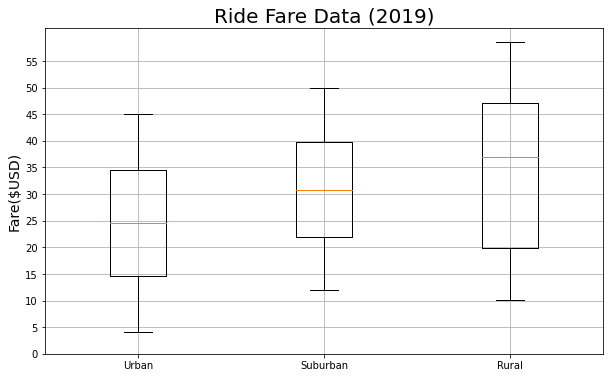

In [135]:
# Create a box-and-whisker plot for the urban fare data.

x_labels = ["Urban", "Suburban", "Rural"]
fare_data = [urban_fares, suburban_fares, rural_fares]
fig, ax = plt.subplots(figsize=(10,6))
ax.boxplot(fare_data, labels=x_labels)

# Add the title, y-axis label and grid.
ax.set_title('Ride Fare Data (2019)', fontsize=20)
ax.set_ylabel('Fare($USD)',fontsize=14)
ax.set_yticks(np.arange(0, 60, step=5.0))
ax.grid()

plt.savefig("analysis/fare_box.png")
plt.show()


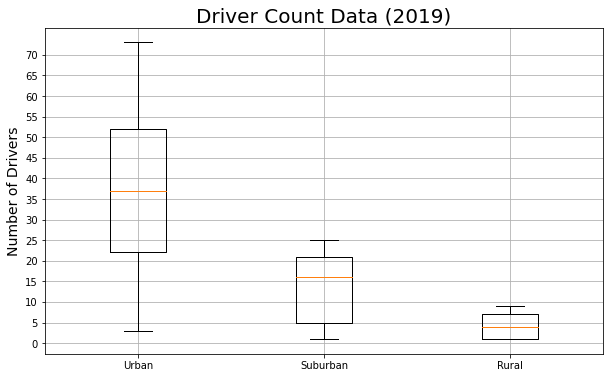

In [136]:
# Create a box-and-whisker plot for the urban fare data.

x_labels = ["Urban", "Suburban", "Rural"]
fare_data = [urban_drivers, suburban_drivers, rural_drivers]
fig, ax = plt.subplots(figsize=(10,6))
ax.boxplot(fare_data, labels=x_labels)

# Add the title, y-axis label and grid.
ax.set_title('Driver Count Data (2019)', fontsize=20)
ax.set_ylabel('Number of Drivers',fontsize=14)
ax.set_yticks(np.arange(0, 75, step=5.0))
ax.grid()

plt.savefig("analysis/driver_count_box.png")
plt.show()


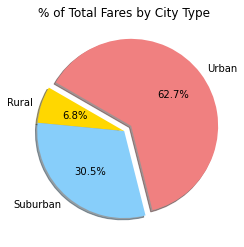

In [151]:
### create a pie chart that visualizes percent of total fares, rides, and drivers for each city type.

# Need to get total fares for each city type
# Need to get total for all fares 
# Need to calculate to calculate the percentage (can by done by plt.pie as well)

# one shot determine total fares for each city from summary data using groupby
pyber_fare_sum = complete_pyber_df.groupby(["type"]).sum()["fare"]
pyber_fare_sum

# determine total fares across pyber
total_pyber_fare = complete_pyber_df.sum()["fare"]
total_pyber_fare

#determine percentages
pyber_fare_type_percent = 100 * pyber_fare_sum/total_pyber_fare
pyber_fare_type_percent

#generate pie chart
plt.pie(pyber_fare_type_percent,
    labels=["Rural", "Suburban", "Urban"],
    colors=["gold", "lightskyblue", "lightcoral"],
    explode=[0, 0, 0.1],
    autopct='%1.1f%%',
    shadow=True, startangle=150)
plt.title("% of Total Fares by City Type")

plt.savefig("analysis/fare_percent_pie.png")

# Show Figure
plt.show()

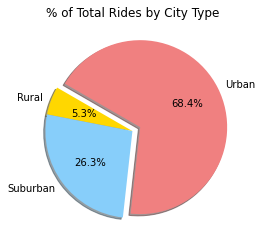

In [153]:
#refactor above code for rides percentage

# one shot determine total rides for each city from summary data using groupby
pyber_ride_count = complete_pyber_df.groupby(["type"]).count()["ride_id"]
pyber_ride_count

# determine total rides across pyber
total_pyber_rides = complete_pyber_df["ride_id"].count()
total_pyber_rides

#determine percentages
pyber_ride_type_percent = 100 * pyber_ride_count/total_pyber_rides
pyber_ride_type_percent

#generate pie chart
plt.pie(pyber_ride_type_percent,
    labels=["Rural", "Suburban", "Urban"],
    colors=["gold", "lightskyblue", "lightcoral"],
    explode=[0, 0, 0.1],
    autopct='%1.1f%%',
    shadow=True, startangle=150)
plt.title("% of Total Rides by City Type")

plt.savefig("analysis/ride_count_percent_pie.png")

# Show Figure
plt.show()


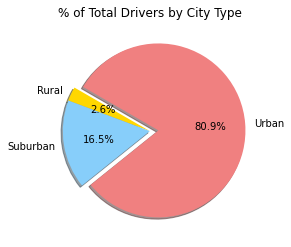

In [157]:
#refactor above code for total drivers

# one shot determine total drivers for each city from summary data using groupby
pyber_driver_count = city_data_df.groupby(["type"]).sum()["driver_count"]
pyber_driver_count

# determine total drivers across pyber
total_pyber_driver = city_data_df["driver_count"].sum()
total_pyber_driver

#determine percentages
pyber_driver_type_percent = 100 * pyber_driver_count/total_pyber_driver
pyber_driver_type_percent

#generate pie chart
plt.pie(pyber_driver_type_percent,
    labels=["Rural", "Suburban", "Urban"],
    colors=["gold", "lightskyblue", "lightcoral"],
    explode=[0, 0, 0.1],
    autopct='%1.1f%%',
    shadow=True, startangle=150)
plt.title("% of Total Drivers by City Type")

plt.savefig("analysis/driver_count_percent_pie.png")

# Show Figure
plt.show()